In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#load data
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

walmart_sales = pd.read_csv("/content/drive/MyDrive/CSE303/Lab 4/Walmart_sales.csv")

df = pd.DataFrame(walmart_sales)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


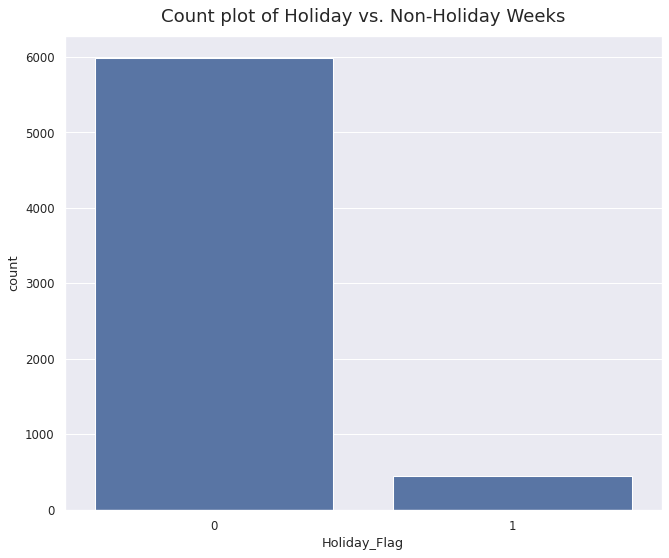

In [ ]:
#Count Plot of Holiday vs. Non-Holiday Weeks:

plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Holiday_Flag'])
plt.title("Count plot of Holiday vs. Non-Holiday Weeks", size=17, pad=13)
plt.show()

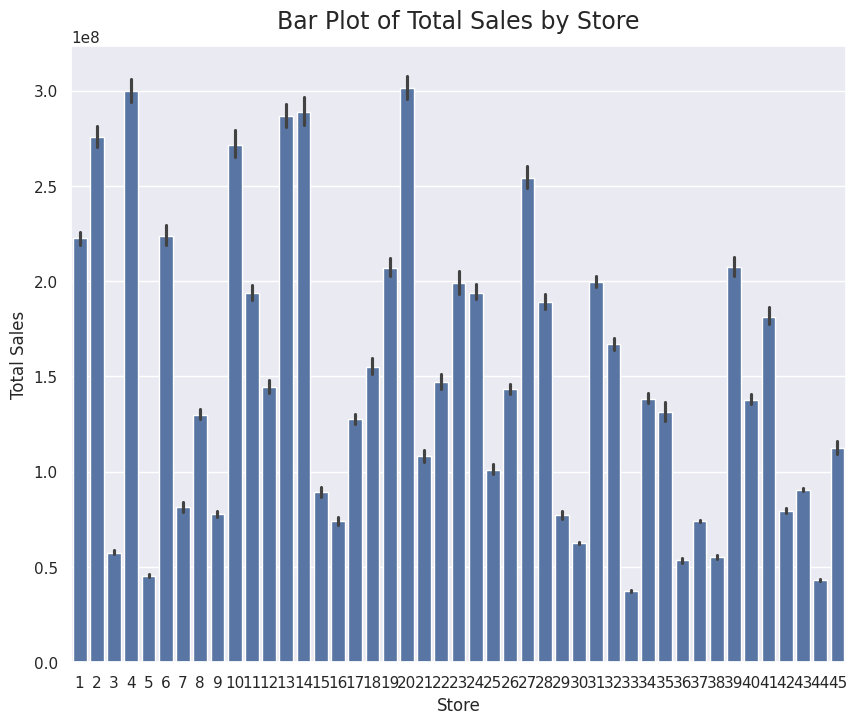

In [ ]:
#Bar Plot of Total Sales by Store:

plt.figure(figsize=(10,8), dpi=100)
sns.barplot(x="Store", y="Weekly_Sales", data=df, estimator= 'sum')
plt.title("Bar Plot of Total Sales by Store", size=17, pad=13 )
plt.ylabel('Total Sales')
plt.show()

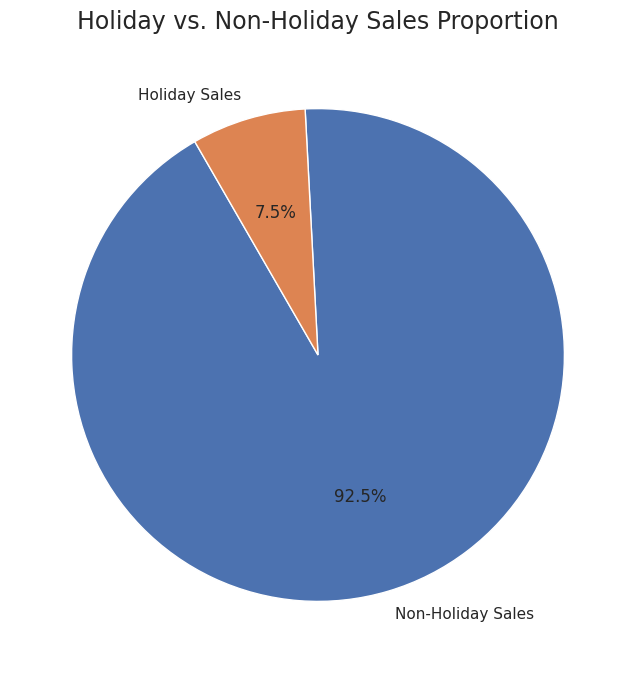

In [3]:
#Pie Chart of Holiday vs. Non-Holiday Sales Proportion:

holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].sum()
plt.figure(figsize=(12,8), dpi=100)
plt.pie(holiday_sales, labels=['Non-Holiday Sales', 'Holiday Sales'], autopct='%1.1f%%', startangle=120)
plt.title('Holiday vs. Non-Holiday Sales Proportion', size=17, pad=13)
plt.show()

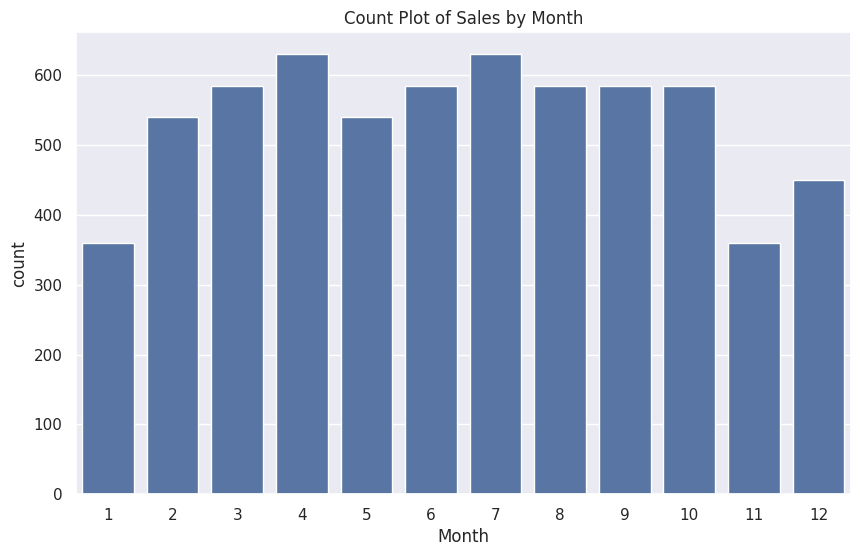

In [ ]:
#Count Plot of Sales by Month:

df['Month'] = pd.to_datetime(df['Date'], format='%d-%m-%Y').dt.month
plt.figure(figsize=(10, 6), dpi=100)
sns.countplot(x='Month', data=df)
plt.title('Count Plot of Sales by Month')
plt.show()

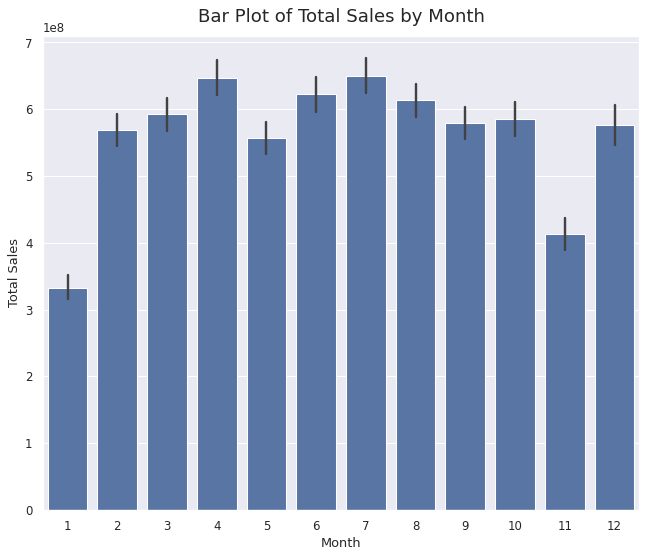

In [ ]:
#Bar Plot of Total Sales by Month:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Month", y="Weekly_Sales", data=df, estimator= 'sum')
plt.title("Bar Plot of Total Sales by Month", size=17, pad=13 )
plt.ylabel('Total Sales')
plt.show()

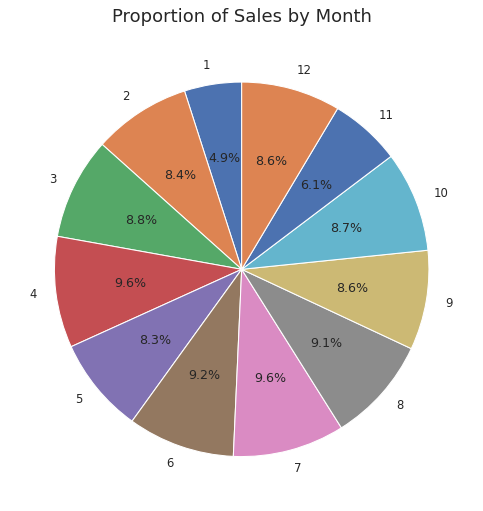

In [ ]:
#Pie Chart of Sales Proportion by Month:

monthly_sales = df.groupby('Month')['Weekly_Sales'].sum()
plt.figure(figsize=(12,8), dpi=76)
plt.pie(monthly_sales, labels=monthly_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Sales by Month', size=17, pad=13)
plt.show()

In [ ]:
#bonus marks if you explore and do 5 exclusive pots of your own idea

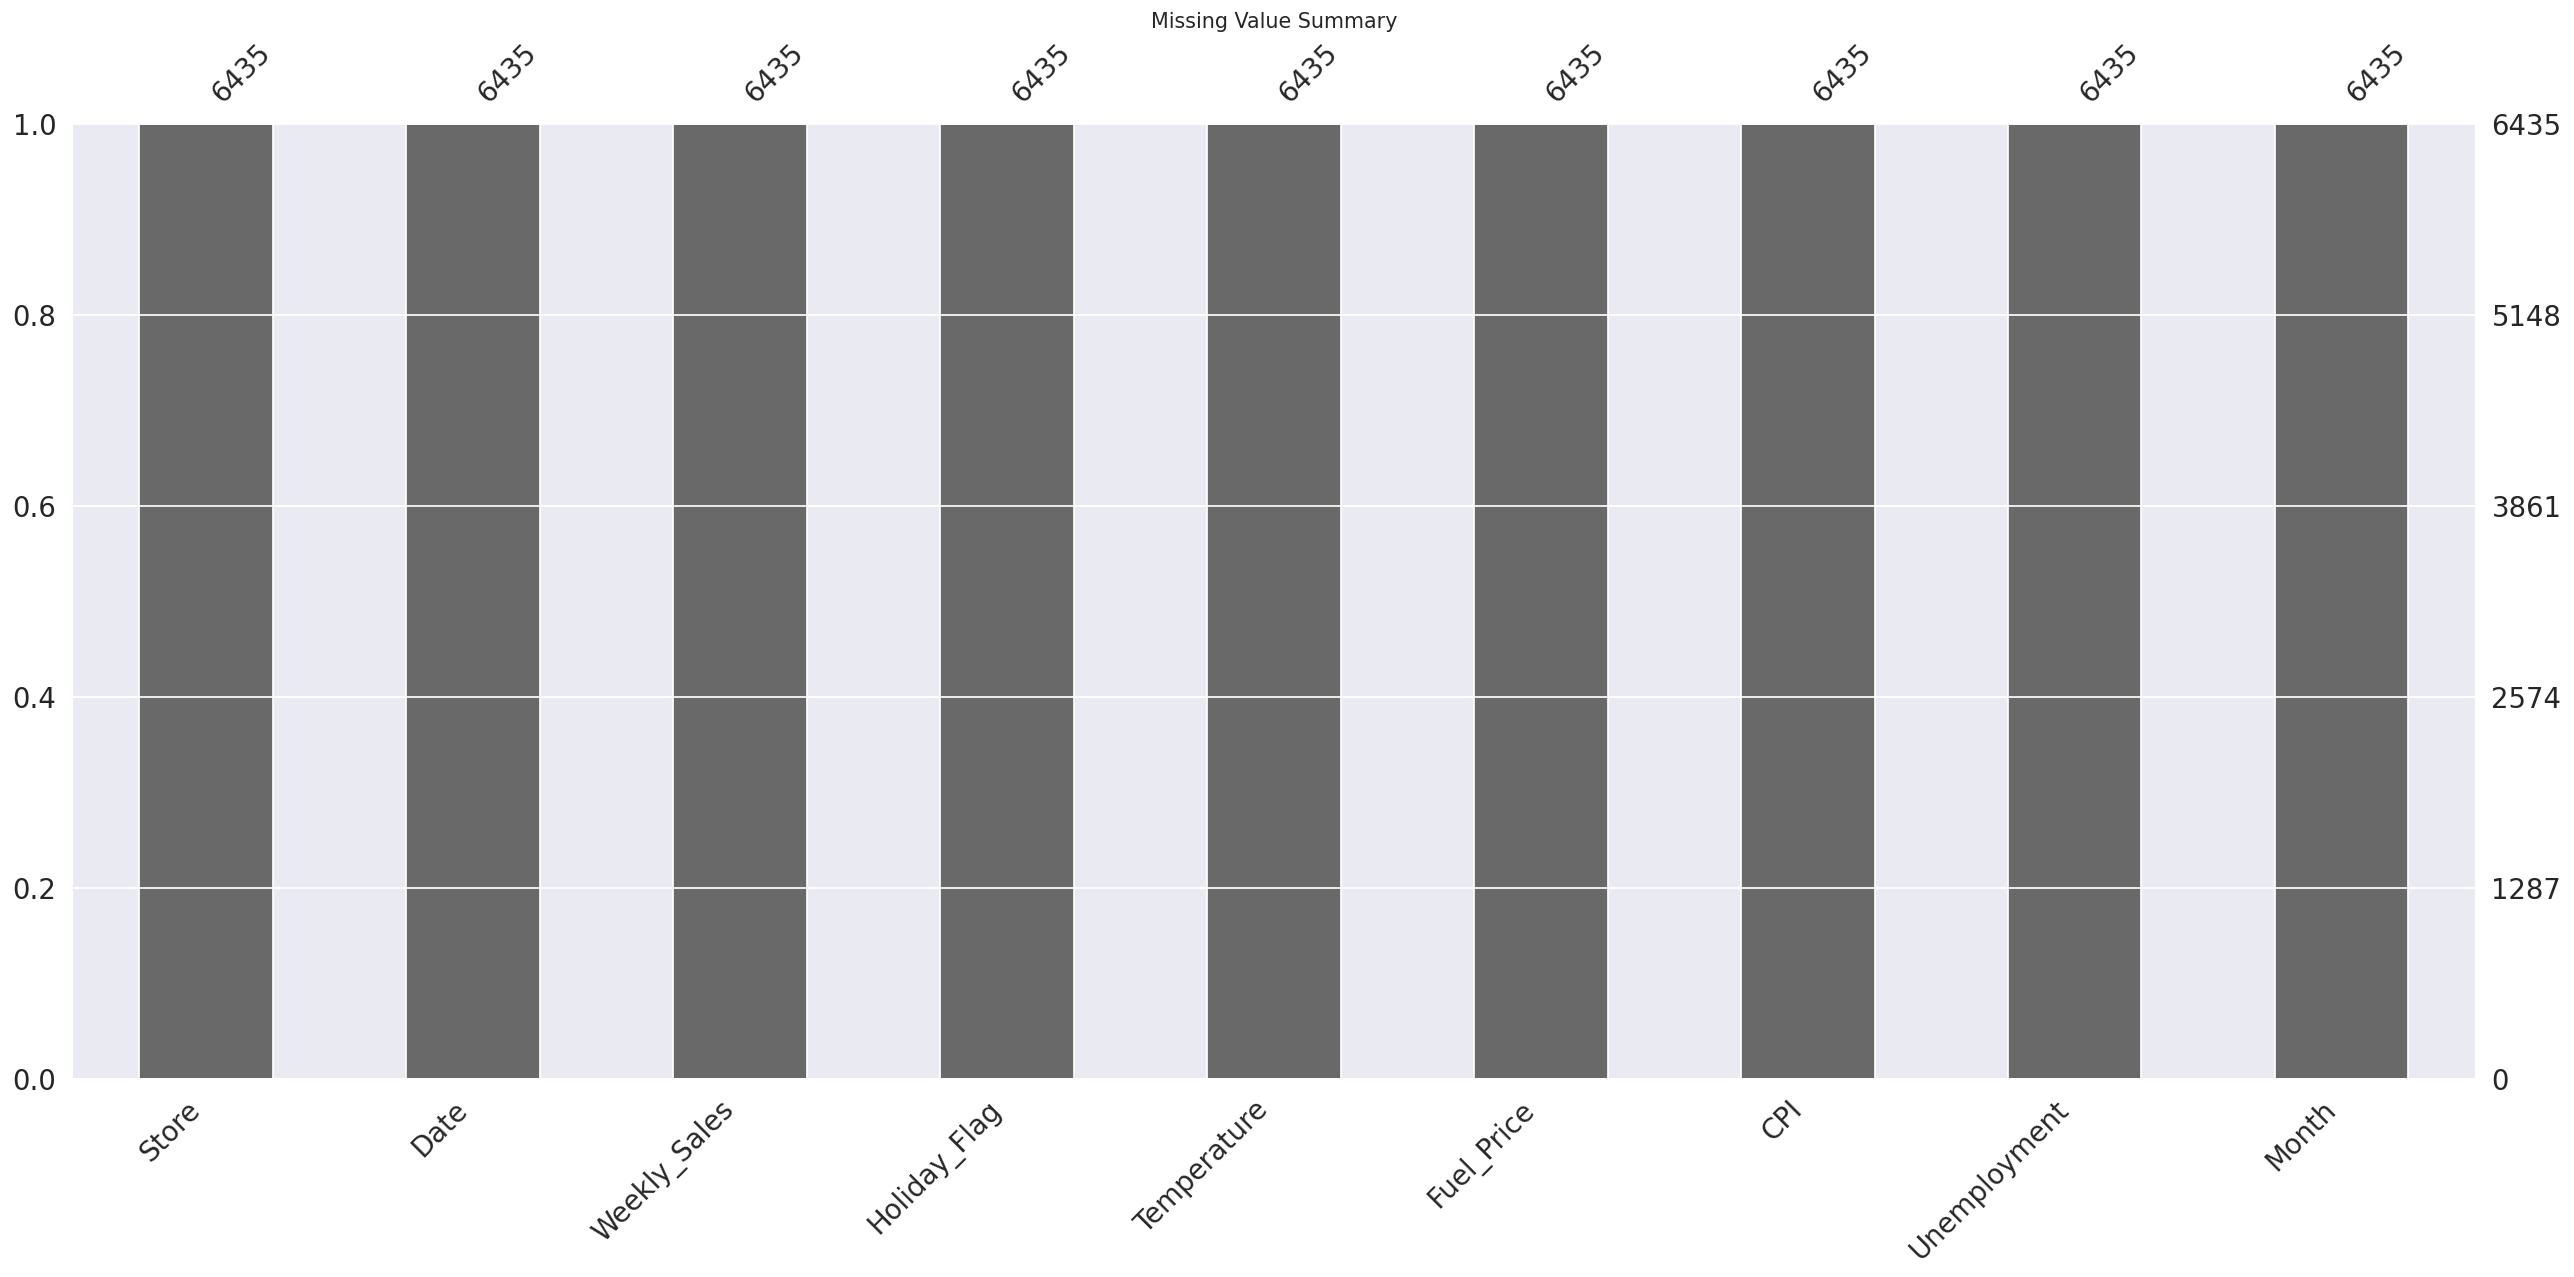

In [ ]:
# Detect missing values
# Visualisation

import missingno as msno
plt.figure(figsize=(10, 6), dpi=124)
msno.bar(df)
plt.title("Missing Value Summary")
plt.show()

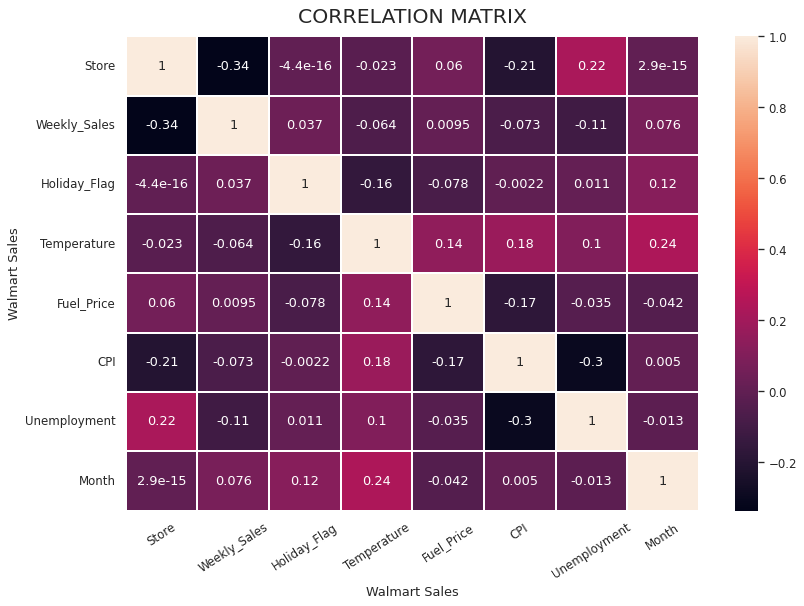

In [ ]:
# Visualisation of the corralation table
# Correlation table

correlation = df.corr(numeric_only=True)
plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('Walmart Sales')
plt.ylabel('Walmart Sales')
plt.xticks(rotation=33)
plt.show()

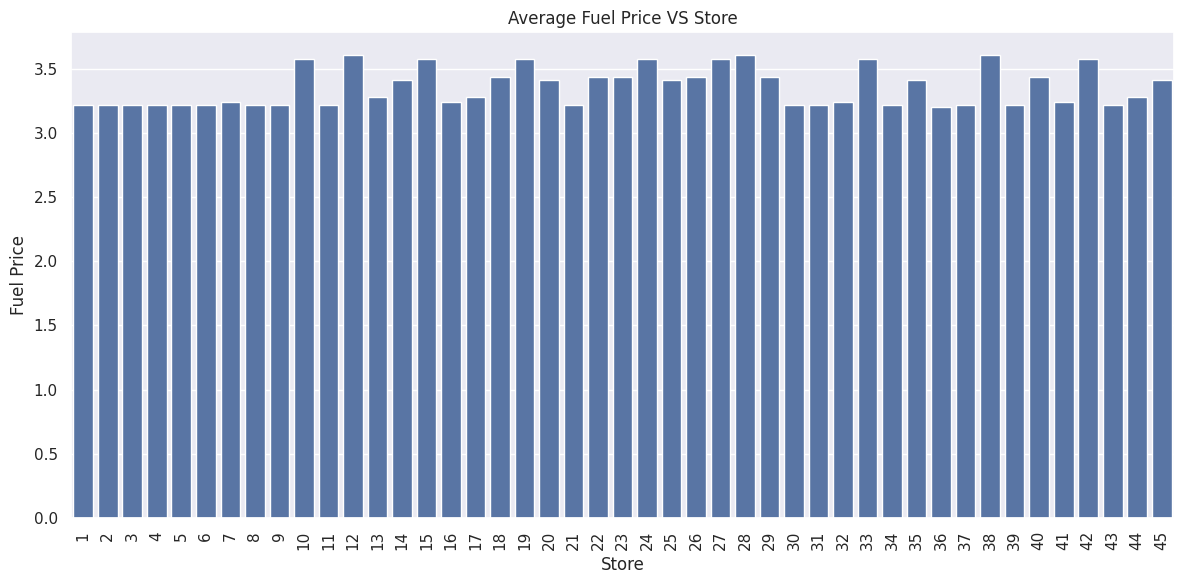

In [ ]:
# Average Fuel Price VS Store
avg_fuel = df.groupby('Store')['Fuel_Price'].mean().reset_index()
plt.figure(figsize=(12, 6), dpi=100)
sns.barplot(x='Store', y='Fuel_Price', data=avg_fuel)
plt.title('Average Fuel Price VS Store')
plt.xticks(rotation=90)
plt.xlabel('Store')
plt.ylabel('Fuel Price')
plt.tight_layout()
plt.show()

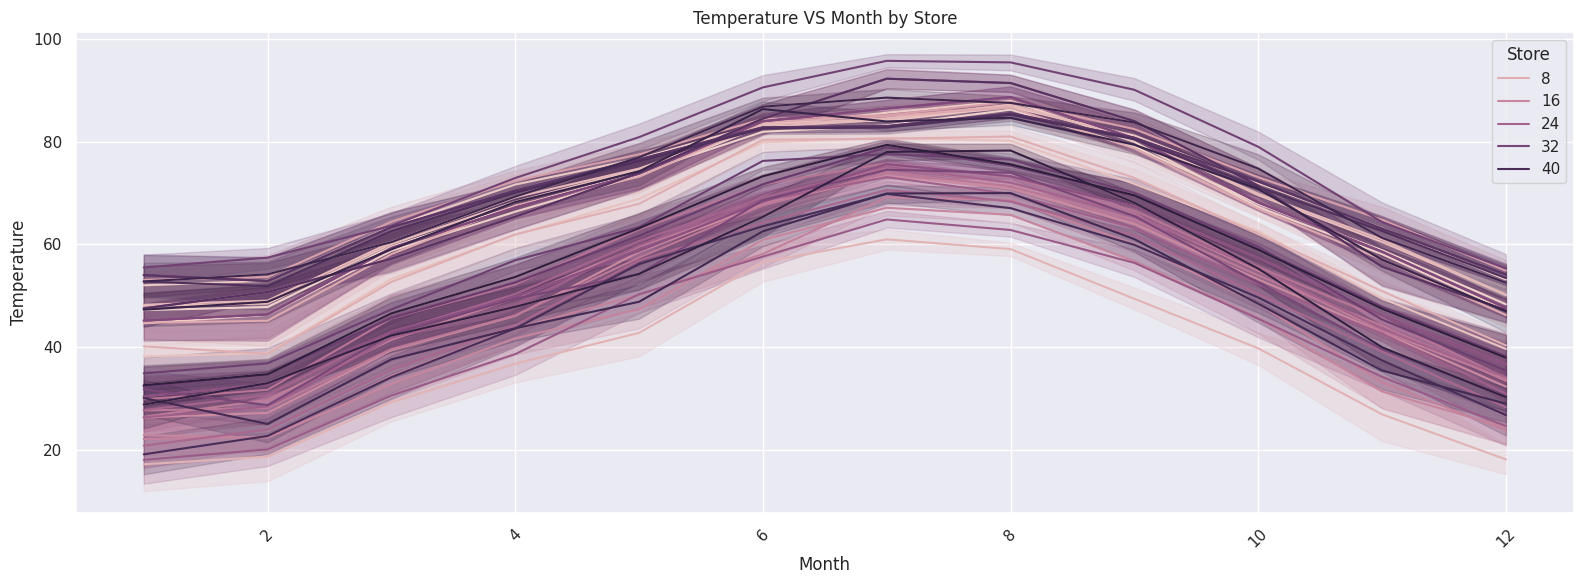

In [ ]:
#Temperature VS Month by Store
plt.figure(figsize=(16, 6))
sns.lineplot(x='Month', y='Temperature', hue='Store', data=df)
plt.title('Temperature VS Month by Store')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

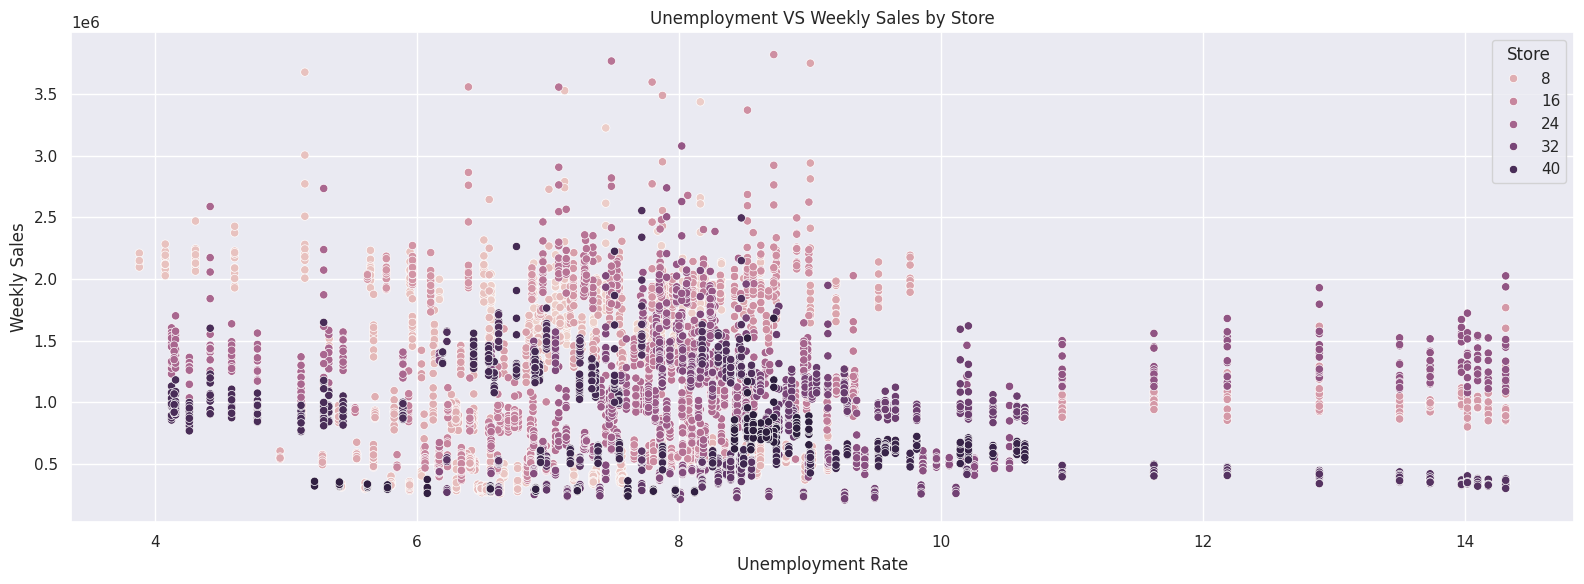

In [ ]:
#Unemployment VS Weekly Sales by Store
plt.figure(figsize=(16, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales',hue='Store', data=df)
plt.title('Unemployment VS Weekly Sales by Store')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.tight_layout()
plt.show()